In [4]:
# !/usr/bin/python
# -*- coding: utf-8 -*-

from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
def restore_image(cb, cluster, shape):
    row, col, dummy = shape
    image = np.empty((row, col, 3))
    index = 0
    for r in range(row):
        for c in range(col):
            image[r, c] = cb[cluster[index]]
            index += 1
    return image


def show_scatter(a):
    N = 10
    print '原始数据：\n', a
    density, edges = np.histogramdd(a, bins=[N,N,N], range=[(0,1), (0,1), (0,1)])
    density /= density.max()
    x = y = z = np.arange(N)
    d = np.meshgrid(x, y, z)

    fig = plt.figure(1, facecolor='w')
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(d[1], d[0], d[2], c='r', s=100*density, marker='o', depthshade=True)
    ax.set_xlabel(u'红色分量', fontproperties=fontproperties)
    ax.set_ylabel(u'绿色分量', fontproperties=fontproperties)
    ax.set_zlabel(u'蓝色分量', fontproperties=fontproperties)
    plt.title(u'图像颜色三维频数分布', fontsize=20, fontproperties=fontproperties)

    plt.figure(2, facecolor='w')
    den = density[density > 0]
    den = np.sort(den)[::-1]
    t = np.arange(len(den))
    plt.plot(t, den, 'r-', t, den, 'go', lw=2)
    plt.title(u'图像颜色频数分布', fontsize=18, fontproperties=fontproperties)
    plt.grid(True)

    plt.show()

原始数据：
[[ 0.29411765  0.50588235  0.12941176]
 [ 0.30196078  0.51372549  0.1372549 ]
 [ 0.30588235  0.51764706  0.14117647]
 ..., 
 [ 0.09803922  0.35686275  0.01176471]
 [ 0.08627451  0.34117647  0.01176471]
 [ 0.07058824  0.3254902   0.        ]]


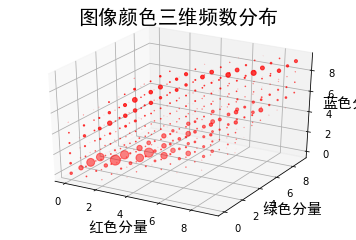

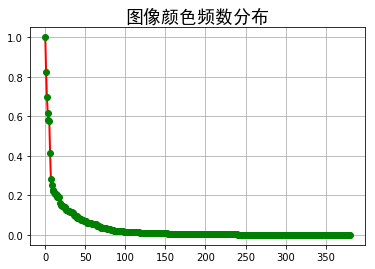

聚类结果：
[11 11 11 ..., 56 56 47]
聚类中心：
[[ 0.15887955  0.42095238  0.00672269]
 [ 0.5087344   0.34652406  0.82602496]
 [ 0.48720822  0.67805789  0.2799253 ]
 [ 0.84493464  0.67696078  0.99297386]
 [ 0.22819795  0.12791783  0.50028011]
 [ 0.75098039  0.87815126  0.50028011]
 [ 0.26642657  0.53645458  0.00656263]
 [ 0.01830065  0.23660131  0.00147059]
 [ 0.4006192   0.25345717  0.78968008]
 [ 0.649742    0.5880289   0.4249742 ]
 [ 0.5311943   0.6855615   0.14010695]
 [ 0.2745098   0.48137255  0.15392157]
 [ 0.96568627  0.92009804  0.98921569]
 [ 0.3497549   0.53823529  0.1939951 ]
 [ 0.65154062  0.632493    0.81064426]
 [ 0.69392157  0.54666667  0.98803922]
 [ 0.26442577  0.11690009  0.59962652]
 [ 0.01666667  0.00441176  0.10343137]
 [ 0.10647059  0.26470588  0.01333333]
 [ 0.20123839  0.41052632  0.08937049]
 [ 0.80882353  0.74166667  0.54558824]
 [ 0.54460784  0.71339869  0.34428105]
 [ 0.36993464  0.6269281   0.00705882]
 [ 0.50294118  0.48235294  0.39460784]
 [ 0.58752228  0.43493761  

In [9]:
num_vq = 60
im = Image.open('../dataset/flower2.png')  # son.bmp(100)/flower2.png(200)/son.png(60)/lena.png(50)
image = np.array(im).astype(np.float) / 255
image = image[:, :, :3]
image_v = image.reshape((-1, 3))
model = KMeans(num_vq)
show_scatter(image_v)

N = image_v.shape[0]  # 图像像素总数
# 选择足够多的样本(如1000个)，计算聚类中心
idx = np.random.randint(0, N, size=1000)
image_sample = image_v[idx]
model.fit(image_sample)
c = model.predict(image_v)  # 聚类结果
print '聚类结果：\n', c
print '聚类中心：\n', model.cluster_centers_

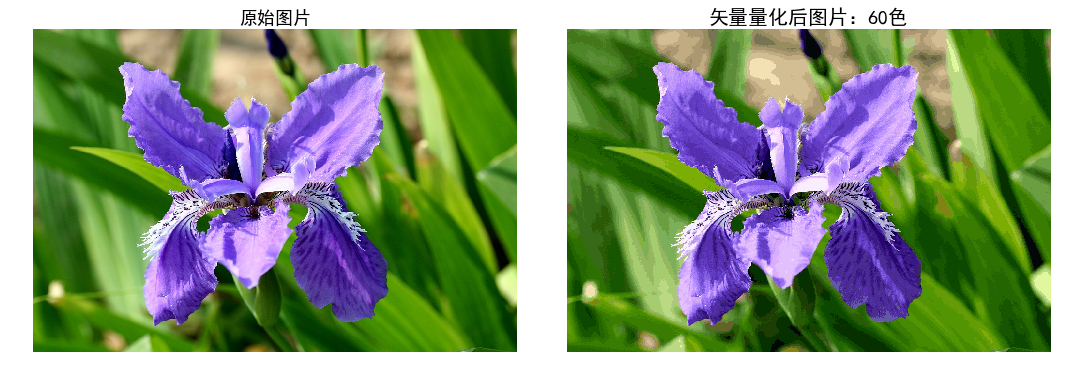

In [7]:
plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.axis('off')
plt.title(u'原始图片', fontsize=18, fontproperties=fontproperties)
plt.imshow(image)
# plt.savefig('1.png')

plt.subplot(122)
vq_image = restore_image(model.cluster_centers_, c, image.shape)
plt.axis('off')
plt.title(u'矢量量化后图片：%d色' % num_vq, fontsize=20, fontproperties=fontproperties)
plt.imshow(vq_image)
# plt.savefig('2.png')

plt.tight_layout(1.2)
plt.show()